In [2]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper

from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_nature.second_q.algorithms import GroundStateEigensolver


driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

mapper = JordanWignerMapper()

ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)

vqe_solver = VQE(Estimator(), ansatz, SLSQP())
vqe_solver.initial_point = [0.0] * ansatz.num_parameters

calc = GroundStateEigensolver(mapper, vqe_solver)

res = calc.solve(es_problem)
print(res)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275030145
  - computed part:      -1.857275030145
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137306035696
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.388948930893]
    - computed part:      [0.0  0.0  1.388948930893]
  > Dipole moment (a.u.): [0.0  0.0  -0.000000230893]  Total: 0.000000230893
                 (debye): [0.0  0.0  -0.000000586872]  Total: 0.000000586872
 


=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.510649165226
  - computed part:      -1.510649165226
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -0.790680170777
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.020 S^2: 0.020 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  0.093725306998]
    - computed part:      [0.0  0.0  0.093725306998]
  > Dipole moment (a.u.): [0.0  0.0  1.295223393002]  Total: 1.295223393002
                 (debye): [0.0  0.0  3.292129177538]  Total: 3.292129177538
 


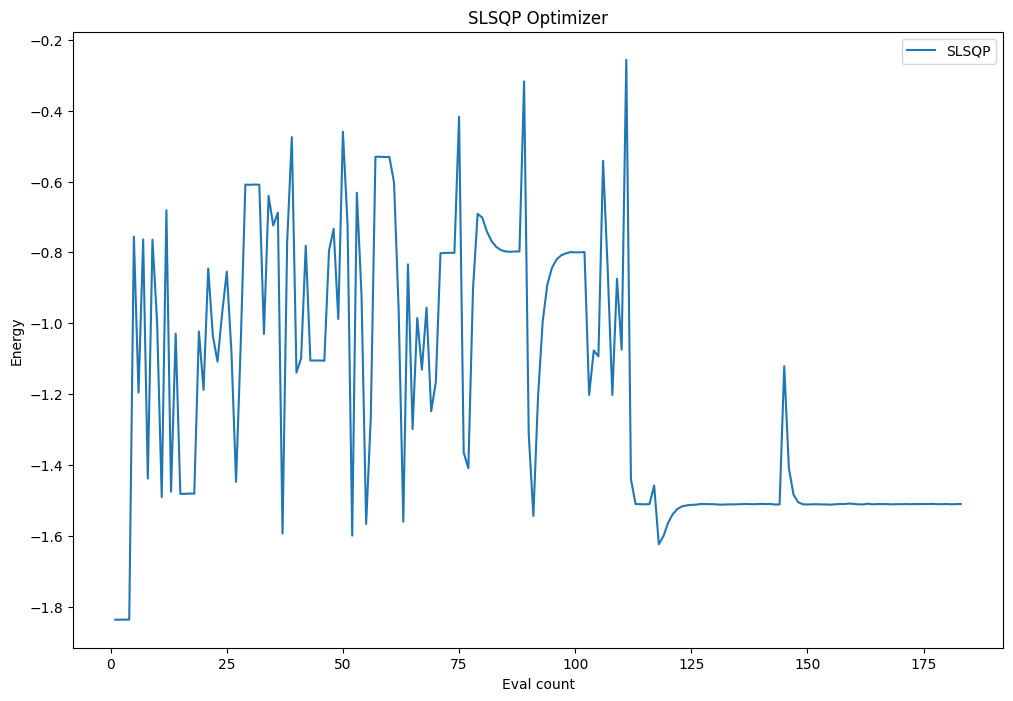

In [20]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper

from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import pylab


counts = []
values = []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

mapper = JordanWignerMapper()

ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)

# estimator = Estimator(options={'shots':1000000})
estimator = Estimator()

optimizer = SLSQP()

vqe_solver = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
vqe_solver.initial_point = [0.0] * ansatz.num_parameters

calc = GroundStateEigensolver(mapper, vqe_solver)

res = calc.solve(es_problem)
print(res)



pylab.rcParams["figure.figsize"] = (12, 8)

pylab.plot(counts, values, label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("SLSQP Optimizer")
pylab.legend(loc="upper right");

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.856646999444
  - computed part:      -1.856646999444
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.136678004995
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.001 S^2: 0.001 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.3764041815]
    - computed part:      [0.0  0.0  1.3764041815]
  > Dipole moment (a.u.): [0.0  0.0  0.0125445185]  Total: 0.0125445185
                 (debye): [0.0  0.0  0.031884982617]  Total: 0.031884982617
 


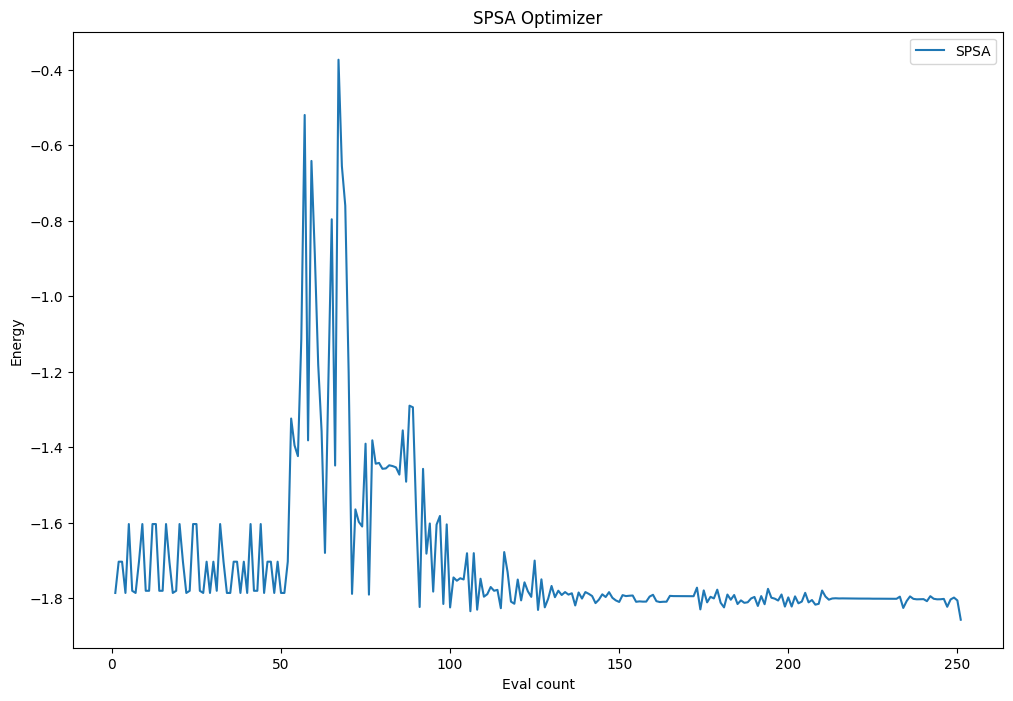

In [17]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper

from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SPSA
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import pylab


counts = []
values = []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

mapper = JordanWignerMapper()

ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)

# estimator = Estimator(options={'shots':1000000})
estimator = Estimator()

optimizer = SPSA()

vqe_solver = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
vqe_solver.initial_point = [0.0] * ansatz.num_parameters

calc = GroundStateEigensolver(mapper, vqe_solver)

res = calc.solve(es_problem)
print(res)



pylab.rcParams["figure.figsize"] = (12, 8)

pylab.plot(counts, values, label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("SPSA Optimizer")
pylab.legend(loc="upper right");

# Noiseless Aer

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.835731156829
  - computed part:      -1.835731156829
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.11576216238
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: -0.005 S^2: -0.005 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.401633924784]
    - computed part:      [0.0  0.0  1.401633924784]
  > Dipole moment (a.u.): [0.0  0.0  -0.012685224784]  Total: 0.012685224784
                 (debye): [0.0  0.0  -0.032242622285]  Total: 0.032242622285
 


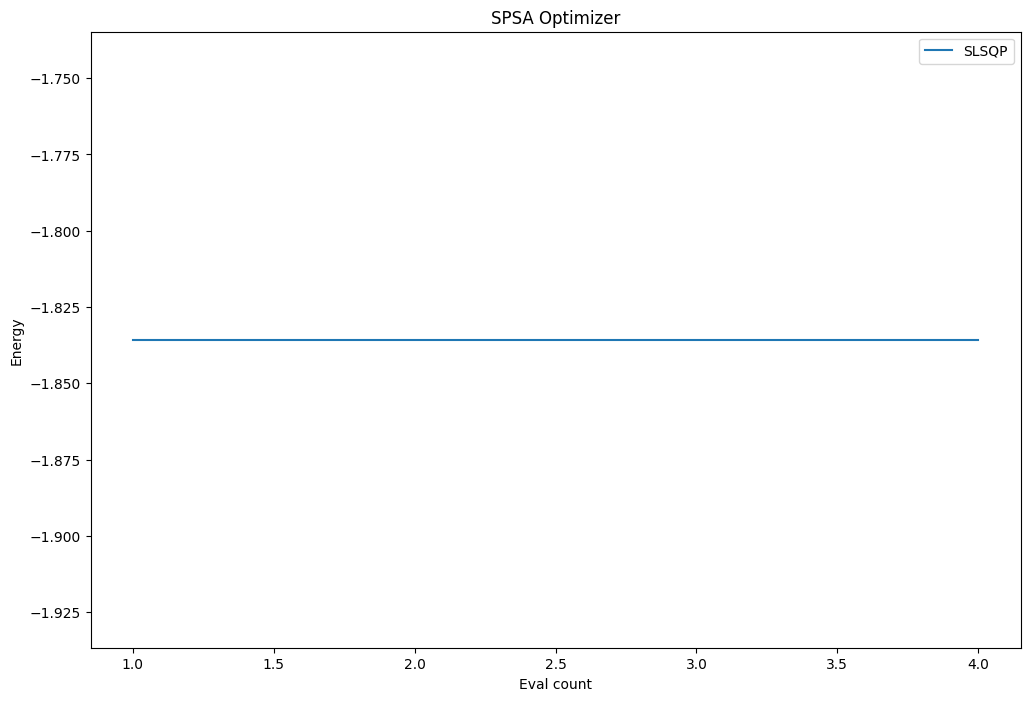

In [35]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper

from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP, SPSA
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import pylab

from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer.primitives import Estimator as AerEstimator



counts = []
values = []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

mapper = JordanWignerMapper()

ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)


# Estimator
seed = 170
algorithm_globals.random_seed = seed

noiseless_estimator = AerEstimator(
    run_options={"seed": seed, "shots": 1024},
    transpile_options={"seed_transpiler": seed},
)

# Optimizer
optimizer = SLSQP()


# VQE
vqe_solver = VQE(noiseless_estimator, ansatz, optimizer, callback=store_intermediate_result)
vqe_solver.initial_point = [0.0] * ansatz.num_parameters

calc = GroundStateEigensolver(mapper, vqe_solver)

res = calc.solve(es_problem)
print(res)



pylab.rcParams["figure.figsize"] = (12, 8)

pylab.plot(counts, values, label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")

pylab.title("SPSA Optimizer")
pylab.legend(loc="upper right");

# Noisy Aer

NoiseModel:
  Basis gates: ['cx', 'delay', 'id', 'measure', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['cx', 'sx', 'measure', 'x', 'id']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('cx', (0, 1)), ('cx', (1, 2)), ('cx', (2, 3)), ('cx', (3, 4)), ('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.827486883844
  - computed part:      -1.827486883844
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.107517889395
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.003 S: 0.006 S^2: 0.006 M: 0.003
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electro

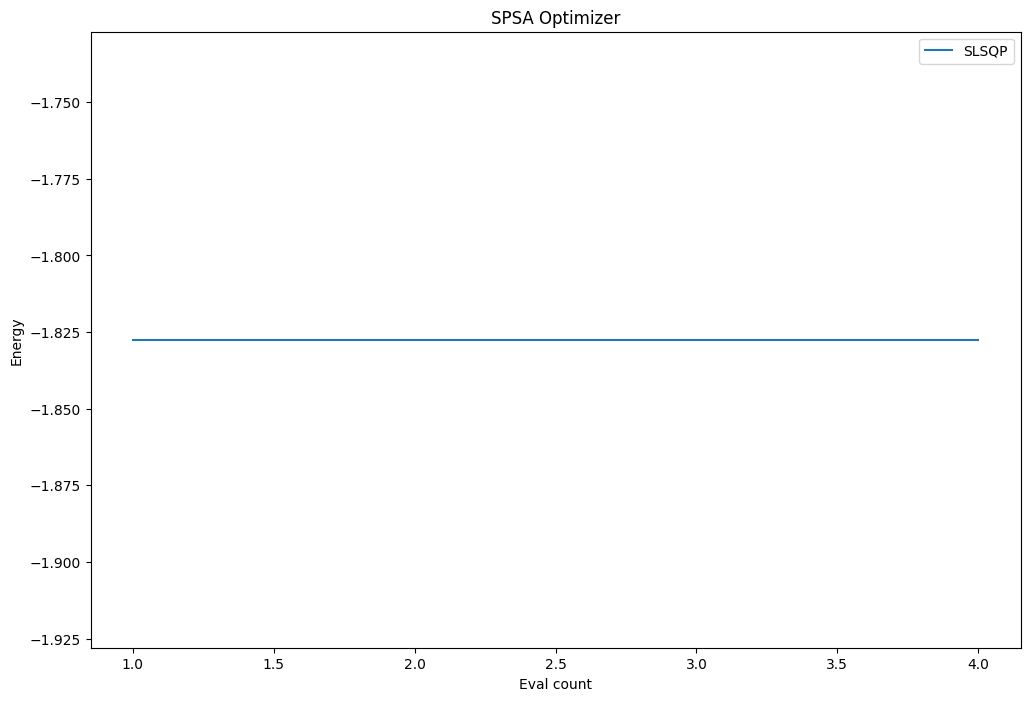

In [34]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper

from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP, SPSA
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import pylab

from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer.primitives import Estimator as AerEstimator

from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import GenericBackendV2



counts = []
values = []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

mapper = JordanWignerMapper()

ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)


# Estimator
seed = 170
algorithm_globals.random_seed = seed

coupling_map = [(0, 1), (1, 2), (2, 3), (3, 4)]
device = GenericBackendV2(num_qubits=5, coupling_map=coupling_map, seed=54)

noise_model = NoiseModel.from_backend(device)

print(noise_model)

noisy_estimator = AerEstimator(
    backend_options={
        "method": "density_matrix",
        "coupling_map": coupling_map,
        "noise_model": noise_model,
    },
    run_options={"seed": seed, "shots": 1024},
    transpile_options={"seed_transpiler": seed},
)



# Optimizer
optimizer = SLSQP()


# VQE
vqe_solver = VQE(noisy_estimator, ansatz, optimizer, callback=store_intermediate_result)
vqe_solver.initial_point = [0.0] * ansatz.num_parameters

calc = GroundStateEigensolver(mapper, vqe_solver)

res = calc.solve(es_problem)
print(res)



pylab.rcParams["figure.figsize"] = (12, 8)

pylab.plot(counts, values, label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")

pylab.title("SPSA Optimizer")
pylab.legend(loc="upper right");

# Qiskit IBM Runtime

In [43]:
from qiskit_ibm_runtime import EstimatorV1, EstimatorV2, EstimatorOptions, QiskitRuntimeService

from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper

from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP, SPSA
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import pylab

from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer.primitives import Estimator as AerEstimator

from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import GenericBackendV2



counts = []
values = []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

mapper = JordanWignerMapper()

ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)


# Estimator

# Save an IBM Quantum account and set it as your default account.
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="d4cab478a1bb4ba5794e218c06ce2414f4c0551214c22012e23224cf89aab2f4ffceebb9585c46eabe6f593b187ae4666975fa99e83691449f384398441f2bec", set_as_default=True)
 
# Load saved credentials
service = QiskitRuntimeService()

backend = service.least_busy(operational=True, simulator=False)

# options = EstimatorOptions()

estimator = EstimatorV2(backend=backend)




# Optimizer
optimizer = SPSA()


# VQE
vqe_solver = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
vqe_solver.initial_point = [0.0] * ansatz.num_parameters

calc = GroundStateEigensolver(mapper, vqe_solver)

res = calc.solve(es_problem)
print(res)



pylab.rcParams["figure.figsize"] = (12, 8)

pylab.plot(counts, values, label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")

pylab.title("SPSA Optimizer")
pylab.legend(loc="upper right")


AlgorithmError: 'The primitive job to evaluate the energy failed!'

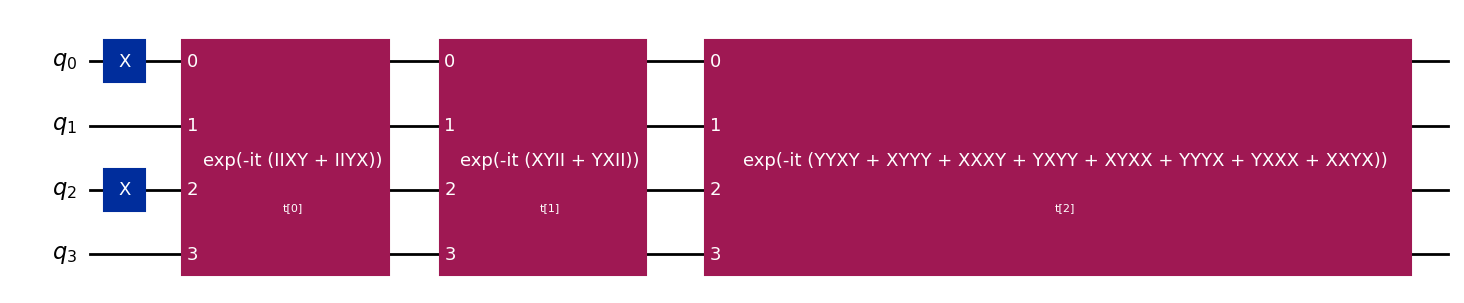

In [46]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper

from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import pylab


counts = []
values = []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

mapper = JordanWignerMapper()

ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)

ansatz.decompose().draw('mpl', style='iqp')

# # estimator = Estimator(options={'shots':1000000})
# estimator = Estimator()

# optimizer = SLSQP()

# vqe_solver = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
# vqe_solver.initial_point = [0.0] * ansatz.num_parameters

# calc = GroundStateEigensolver(mapper, vqe_solver)

# res = calc.solve(es_problem)
# print(res)



# pylab.rcParams["figure.figsize"] = (12, 8)

# pylab.plot(counts, values, label=type(optimizer).__name__)
# pylab.xlabel("Eval count")
# pylab.ylabel("Energy")
# pylab.title("SLSQP Optimizer")
# pylab.legend(loc="upper right");

In [47]:
num_params = ansatz.num_parameters
num_params

3

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

ansatz_isa = pm.run(ansatz)